In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Load dataset =====
df = pd.read_csv("data_science_salaries.csv")

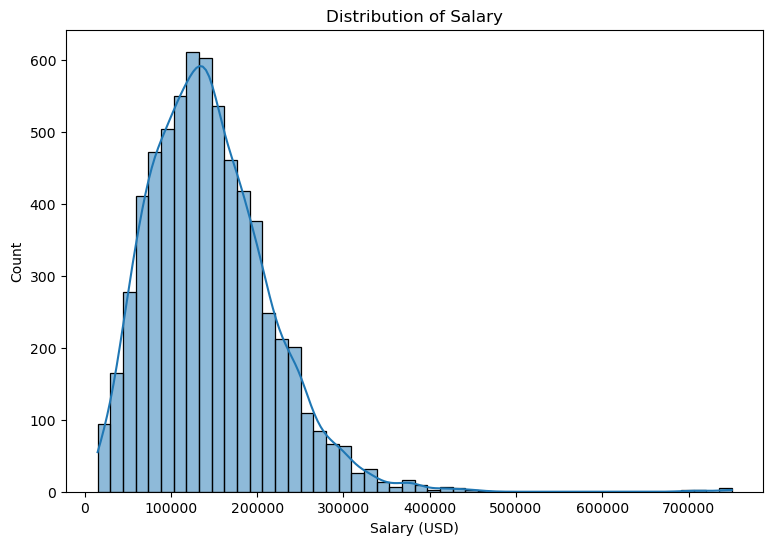

In [9]:
plt.figure(figsize=(9, 6))
sns.histplot(df["salary_in_usd"], bins=50, kde=True)
plt.title("Distribution of Salary")
plt.xlabel("Salary (USD)")
plt.show()

In [10]:
df['salary_in_usd'].mode()

0    100000
Name: salary_in_usd, dtype: int64

In [11]:
df['salary_in_usd'].median()

138666.0

In [12]:
df['salary_in_usd'].skew()

1.3607055055089352

In [13]:
df.groupby('experience_level')['salary_in_usd'].mean()

experience_level
Entry-level         84448.916814
Executive-level    189687.346457
Mid-level          119019.812537
Senior-level       162071.063581
Name: salary_in_usd, dtype: float64

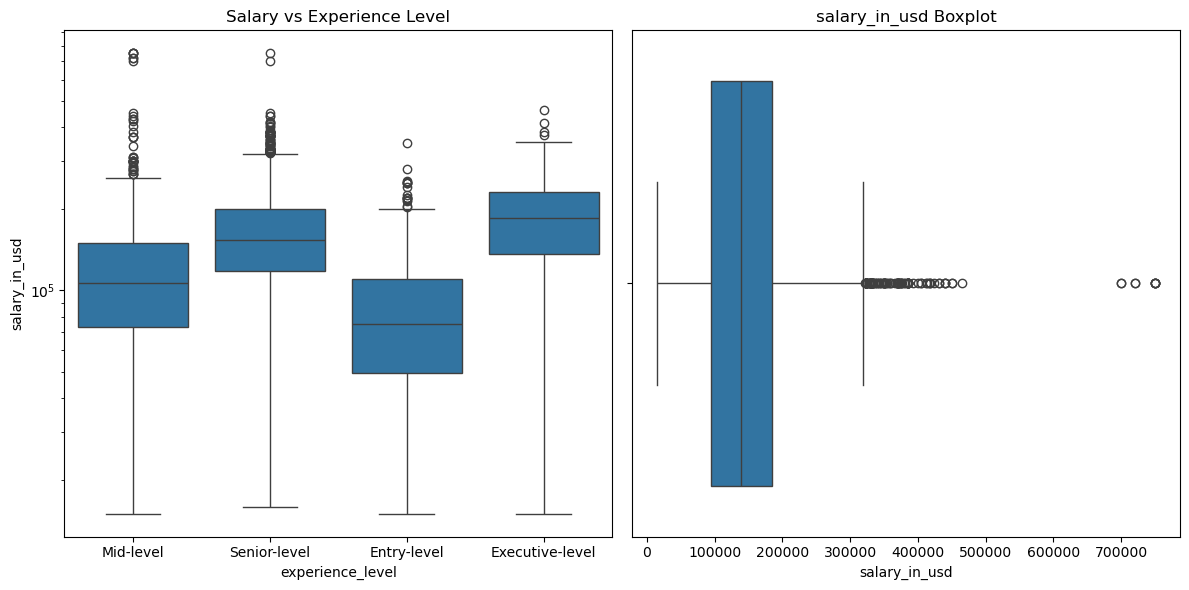

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(
    x="experience_level",
    y="salary_in_usd",
    data=df,
)
plt.title("Salary vs Experience Level")
plt.yscale("log") 

plt.subplot(1, 2, 2)
sns.boxplot(df, x='salary_in_usd')
plt.title('salary_in_usd Boxplot')
plt.xlabel('salary_in_usd')
plt.tight_layout()
plt.show()

In [15]:
df['employment_type'].mode()

0    Full-time
Name: employment_type, dtype: object

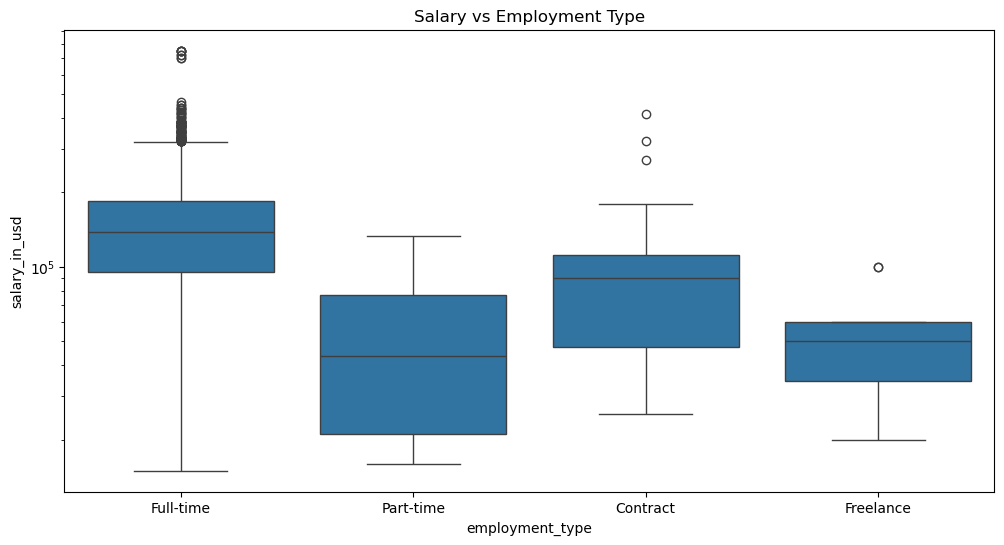

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="employment_type",
    y="salary_in_usd",
    data=df
)
plt.title("Salary vs Employment Type")
plt.yscale("log")
plt.show()

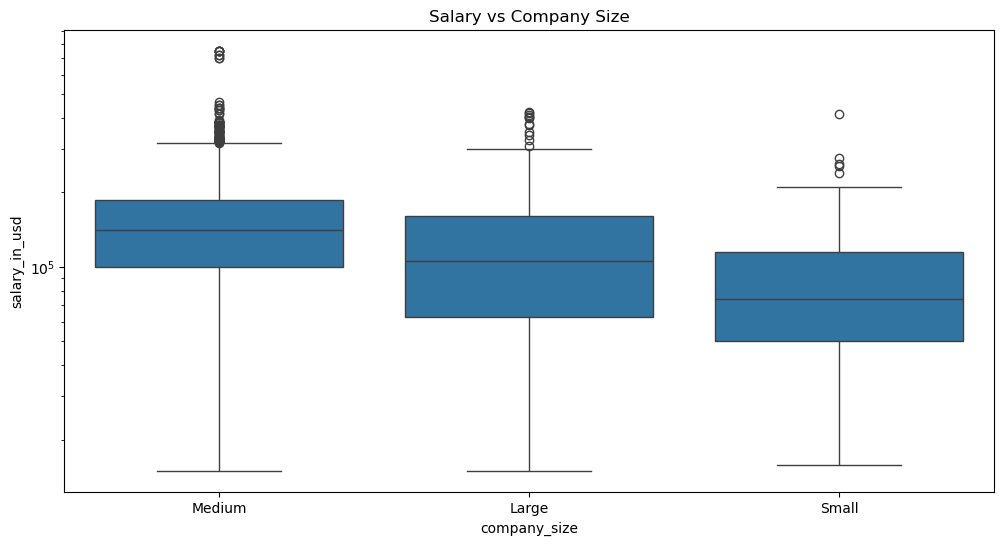

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="company_size",
    y="salary_in_usd",
    data=df
)
plt.title("Salary vs Company Size")
plt.yscale("log")
plt.show()

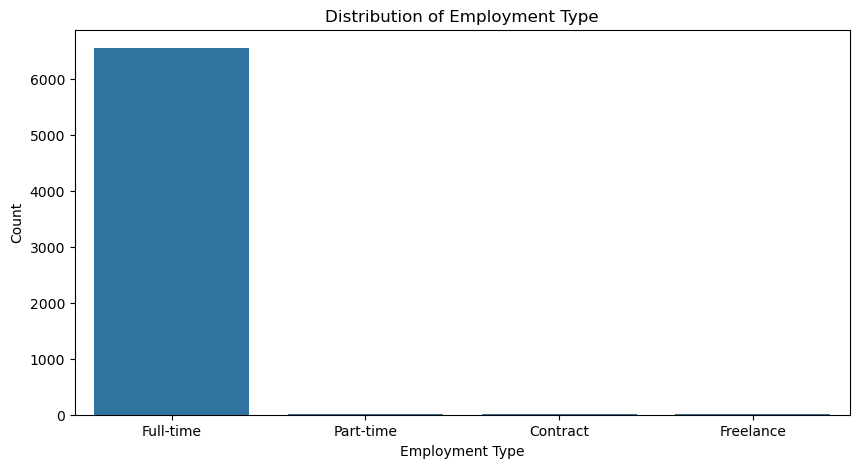

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="employment_type", data=df)
plt.title("Distribution of Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

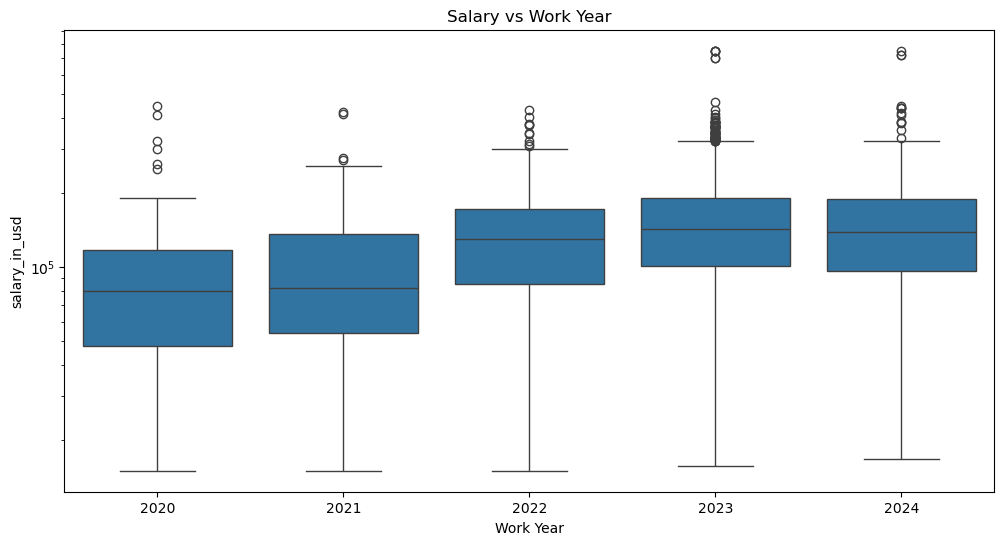

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="work_year",
    y="salary_in_usd",
    data=df
)
plt.title("Salary vs Work Year")
plt.yscale("log")
plt.xlabel("Work Year")
plt.show()

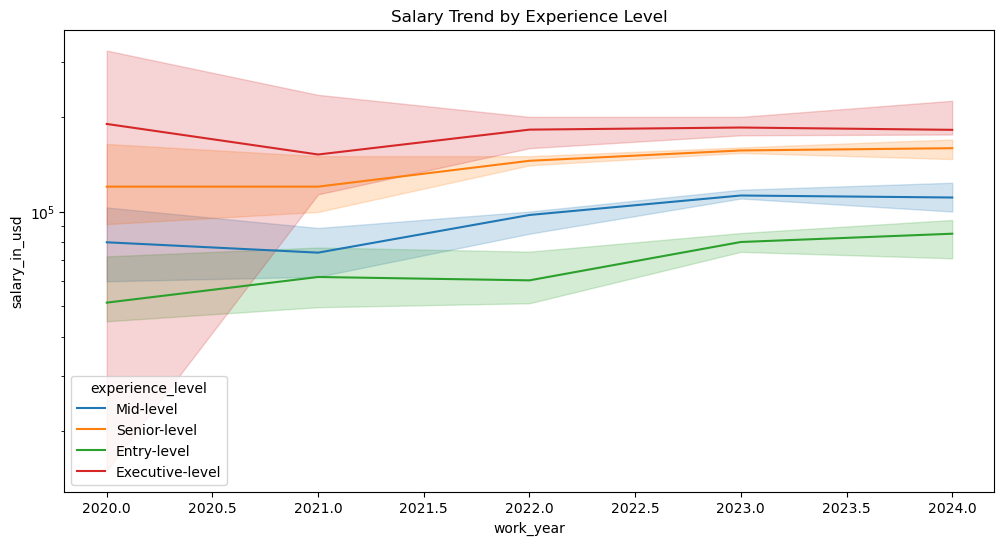

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(
    x="work_year",
    y="salary_in_usd",
    hue="experience_level",
    data=df,
    estimator="median"
)
plt.title("Salary Trend by Experience Level")
plt.yscale("log")
plt.show()


In [21]:
df['experience_level'].mode()

0    Senior-level
Name: experience_level, dtype: object

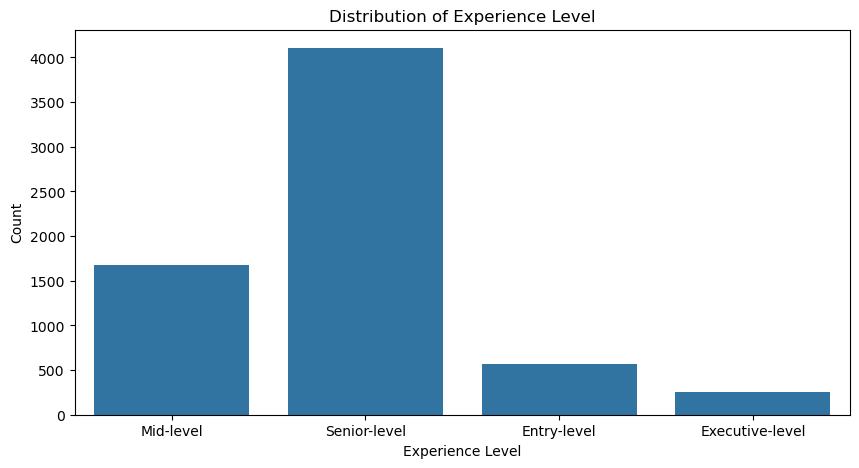

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="experience_level", data=df)
plt.title("Distribution of Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

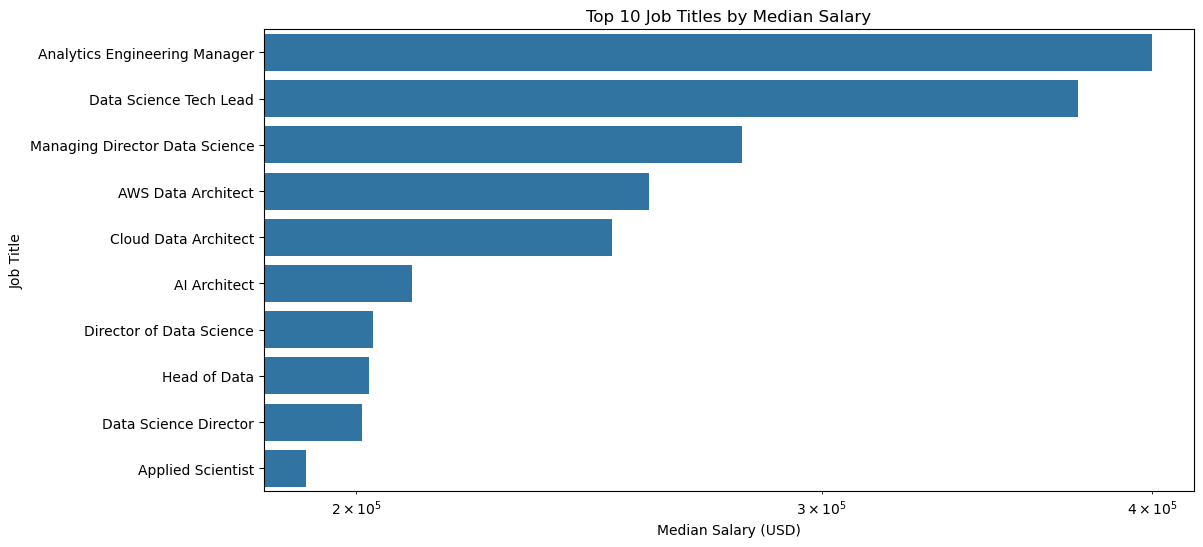

In [23]:
top_jobs = (
    df.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_jobs.values,
    y=top_jobs.index
)
plt.title("Top 10 Job Titles by Median Salary")
plt.xscale("log")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Job Title")
plt.show()


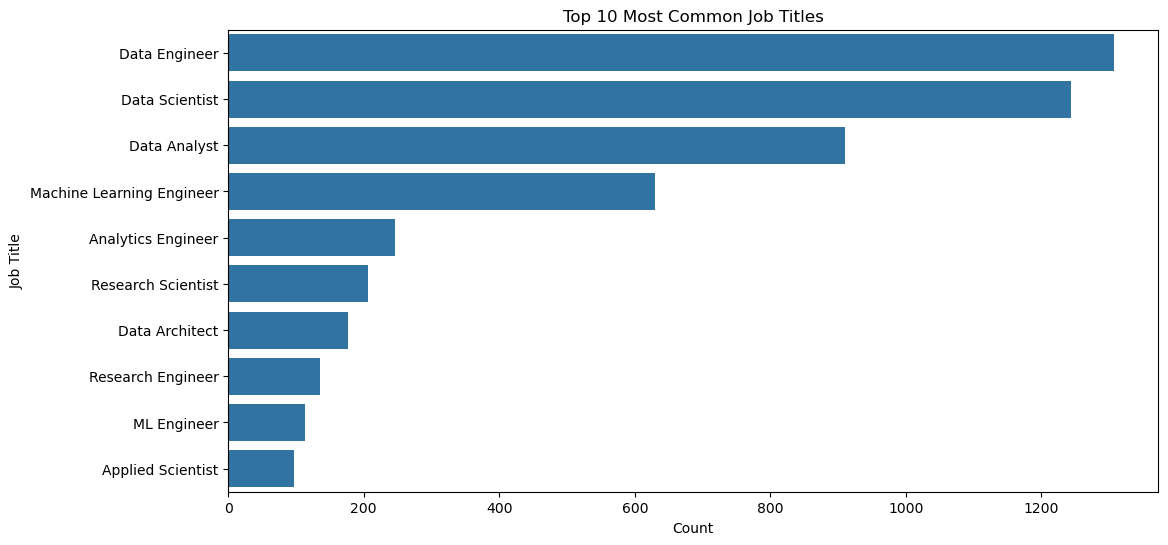

In [24]:
top_titles = df["job_title"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_titles.values,
    y=top_titles.index
)
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()


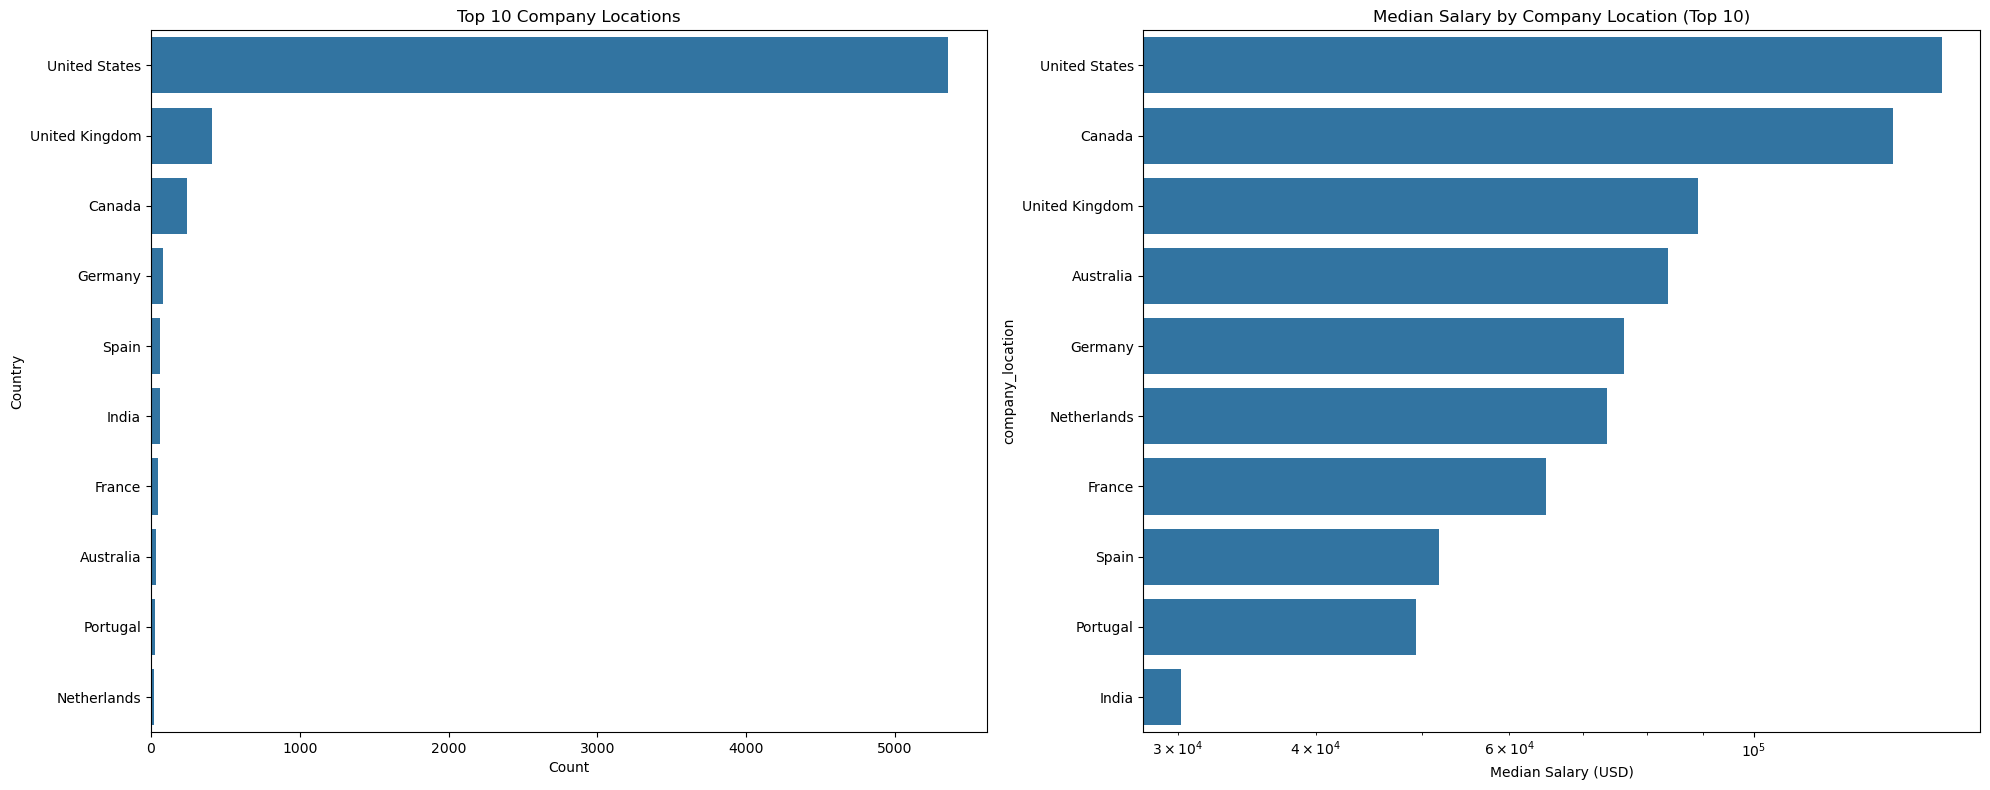

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 10 company locations (count)
top_countries = df["company_location"].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    ax=axes[0]
)
axes[0].set_title("Top 10 Company Locations")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Country")

# Median salary by company location
top_countries_salary = (
    df[df["company_location"].isin(top_countries.index)]
    .groupby("company_location")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
)

sns.barplot(
    x=top_countries_salary.values,
    y=top_countries_salary.index,
    ax=axes[1]
)
axes[1].set_title("Median Salary by Company Location (Top 10)")
axes[1].set_xlabel("Median Salary (USD)")
axes[1].set_xscale("log")

plt.tight_layout()
plt.show()

In [26]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size', 'exp_encoded'],
      dtype='object')

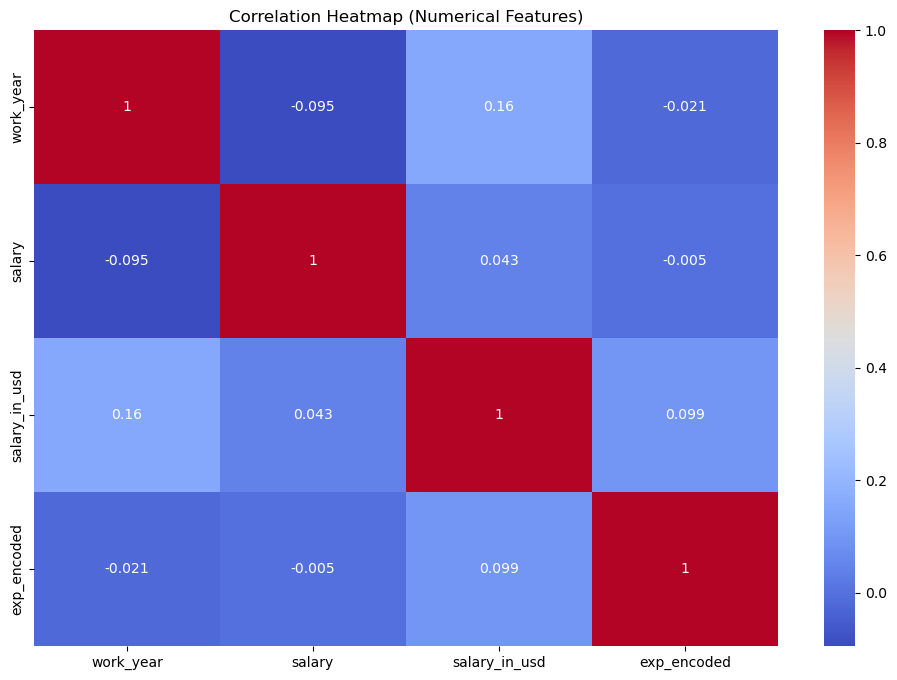

In [27]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

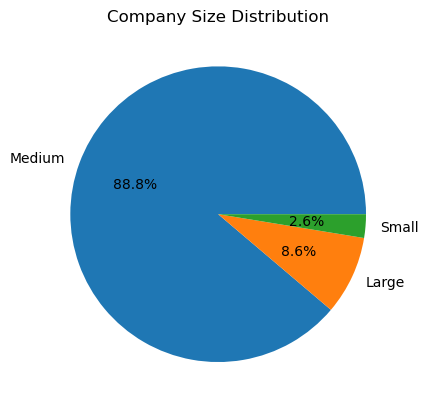

In [32]:
company_size_counts = df["company_size"].value_counts()
plt.figure()
plt.pie(company_size_counts, labels=company_size_counts.index, autopct="%1.1f%%")
plt.title("Company Size Distribution")
plt.show()